# Data Collection and Preparation

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk
from sklearn import linear_model
from sklearn import tree
from sklearn import ensemble
from sklearn import svm
import xgboost
from collections import Counter
from sklearn.preprocessing import LabelEncoder


In [ ]:
data= pd.read_csv("/content/traffic volume.csv")

In [ ]:
data.head()

,holiday,temp,rain,snow,weather,date,Time,traffic_volume
0,None,288.28,0.0,0.0,Clouds,02-10-2012,09:00:00,5545
1,None,289.36,0.0,0.0,Clouds,02-10-2012,10:00:00,4516
2,None,289.58,0.0,0.0,Clouds,02-10-2012,11:00:00,4767
3,None,290.13,0.0,0.0,Clouds,02-10-2012,12:00:00,5026
4,None,291.14,0.0,0.0,Clouds,02-10-2012,13:00:00,4918


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   holiday         48204 non-null  object 
 1   temp            48151 non-null  float64
 2   rain            48202 non-null  float64
 3   snow            48192 non-null  float64
 4   weather         48155 non-null  object 
 5   date            48204 non-null  object 
 6   Time            48204 non-null  object 
 7   traffic_volume  48204 non-null  int64  
dtypes: float64(3), int64(1), object(4)
memory usage: 2.9+ MB


In [ ]:
data.isnull().sum()

holiday            0
temp              53
rain               2
snow              12
weather           49
date               0
Time               0
traffic_volume     0
dtype: int64

In [ ]:
data['temp'].fillna(data['temp'].mean(),inplace=True)
data['rain'].fillna(data['rain'].mean(),inplace=True)
data['snow'].fillna(data['snow'].mean(),inplace=True)

In [ ]:
Counter(data['weather'])

Counter({'Clouds': 15144,
         'Clear': 13383,
         'Rain': 5665,
         'Drizzle': 1818,
         'Mist': 5942,
         'Haze': 1359,
         nan: 49,
         'Fog': 912,
         'Thunderstorm': 1033,
         'Snow': 2875,
         'Squall': 4,
         'Smoke': 20})

In [ ]:
data[['day','month','year']]=data['date'].str.split('-',expand=True)

In [ ]:
data[['hours','minutes','seconds']]=data['Time'].str.split(':',expand=True)

In [ ]:
data.drop(columns=['date','Time'],axis=1,inplace=True)

In [ ]:
wea=data.weather.unique()
encoder = LabelEncoder()
data_list = list(filter(lambda x: isinstance(x, str), wea))
encoder.fit(data_list)
data['weather'] = data['weather'].astype('category').cat.codes
data

,holiday,temp,rain,snow,weather,traffic_volume,day,month,year,hours,minutes,seconds
0,None,288.28,0.0,0.0,1,5545,02,10,2012,09,00,00
1,None,289.36,0.0,0.0,1,4516,02,10,2012,10,00,00
2,None,289.58,0.0,0.0,1,4767,02,10,2012,11,00,00
3,None,290.13,0.0,0.0,1,5026,02,10,2012,12,00,00
4,None,291.14,0.0,0.0,1,4918,02,10,2012,13,00,00
...,...,...,...,...,...,...,...,...,...,...,...,...
48199,None,283.45,0.0,0.0,1,3543,30,09,2018,19,00,00
48200,None,282.76,0.0,0.0,1,2781,30,09,2018,20,00,00
48201,None,282.73,0.0,0.0,10,2159,30,09,2018,21,00,00
48202,None,282.09,0.0,0.0,1,1450,30,09,2018,22,00,00


In [ ]:
holi=data.holiday.unique()
encoder = LabelEncoder()
data_list1 = list(filter(lambda x: isinstance(x, str), holi))
encoder.fit(data_list1)
data['holiday'] = data['holiday'].astype('category').cat.codes
data

,holiday,temp,rain,snow,weather,traffic_volume,day,month,year,hours,minutes,seconds
0,7,288.28,0.0,0.0,1,5545,02,10,2012,09,00,00
1,7,289.36,0.0,0.0,1,4516,02,10,2012,10,00,00
2,7,289.58,0.0,0.0,1,4767,02,10,2012,11,00,00
3,7,290.13,0.0,0.0,1,5026,02,10,2012,12,00,00
4,7,291.14,0.0,0.0,1,4918,02,10,2012,13,00,00
...,...,...,...,...,...,...,...,...,...,...,...,...
48199,7,283.45,0.0,0.0,1,3543,30,09,2018,19,00,00
48200,7,282.76,0.0,0.0,1,2781,30,09,2018,20,00,00
48201,7,282.73,0.0,0.0,10,2159,30,09,2018,21,00,00
48202,7,282.09,0.0,0.0,1,1450,30,09,2018,22,00,00


In [ ]:
data.head()

,holiday,temp,rain,snow,weather,traffic_volume,day,month,year,hours,minutes,seconds
0,7,288.28,0.0,0.0,1,5545,02,10,2012,09,00,00
1,7,289.36,0.0,0.0,1,4516,02,10,2012,10,00,00
2,7,289.58,0.0,0.0,1,4767,02,10,2012,11,00,00
3,7,290.13,0.0,0.0,1,5026,02,10,2012,12,00,00
4,7,291.14,0.0,0.0,1,4918,02,10,2012,13,00,00


In [ ]:
data.describe()

,holiday,temp,rain,snow,weather,traffic_volume
count,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000
mean,6.997780,281.205351,0.334278,0.000222,2.574662,3259.818355
std,0.139999,13.336338,44.789133,0.008168,2.785369,1986.860670
min,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000
25%,7.000000,272.180000,0.000000,0.000000,0.000000,1193.000000
50%,7.000000,282.429000,0.000000,0.000000,1.000000,3380.000000
75%,7.000000,291.800000,0.000000,0.000000,5.000000,4933.000000
max,11.000000,310.070000,9831.300000,0.510000,10.000000,7280.000000


In [ ]:
cor=data.corr()
cor

<ipython-input-21-42f3d3de063e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor=data.corr()


,holiday,temp,rain,snow,weather,traffic_volume
holiday,1.000000,-0.000472,0.000066,0.000432,-0.004336,0.018676
temp,-0.000472,1.000000,0.009070,-0.019758,-0.033761,0.130034
rain,0.000066,0.009070,1.000000,-0.000090,0.009541,0.004714
snow,0.000432,-0.019758,-0.000090,1.000000,0.036658,0.000735
weather,-0.004336,-0.033761,0.009541,0.036658,1.000000,-0.039997
traffic_volume,0.018676,0.130034,0.004714,0.000735,-0.039997,1.000000


<Axes: >

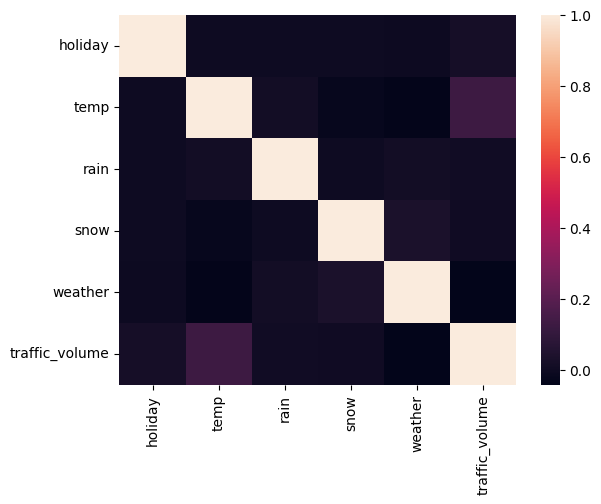

In [ ]:
sns.heatmap(cor)

# Exploratory Data Analysis

<Axes: xlabel='weather', ylabel='count'>

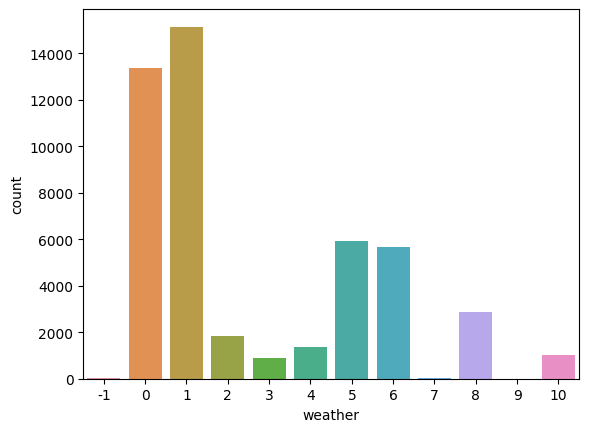

In [ ]:
sns.countplot(x='weather', data=data)

<Axes: xlabel='holiday', ylabel='count'>

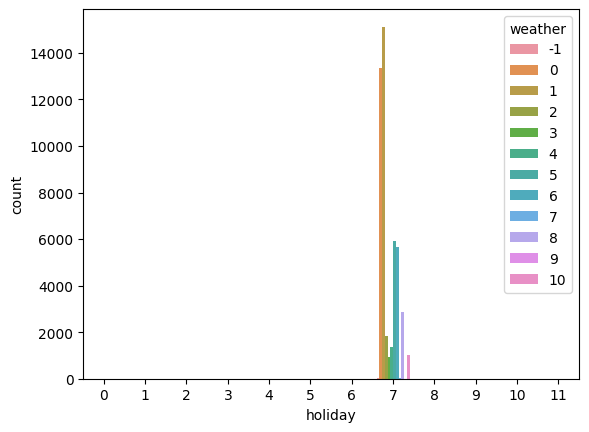

In [ ]:
sns.countplot(x='holiday',hue='weather',data=data)


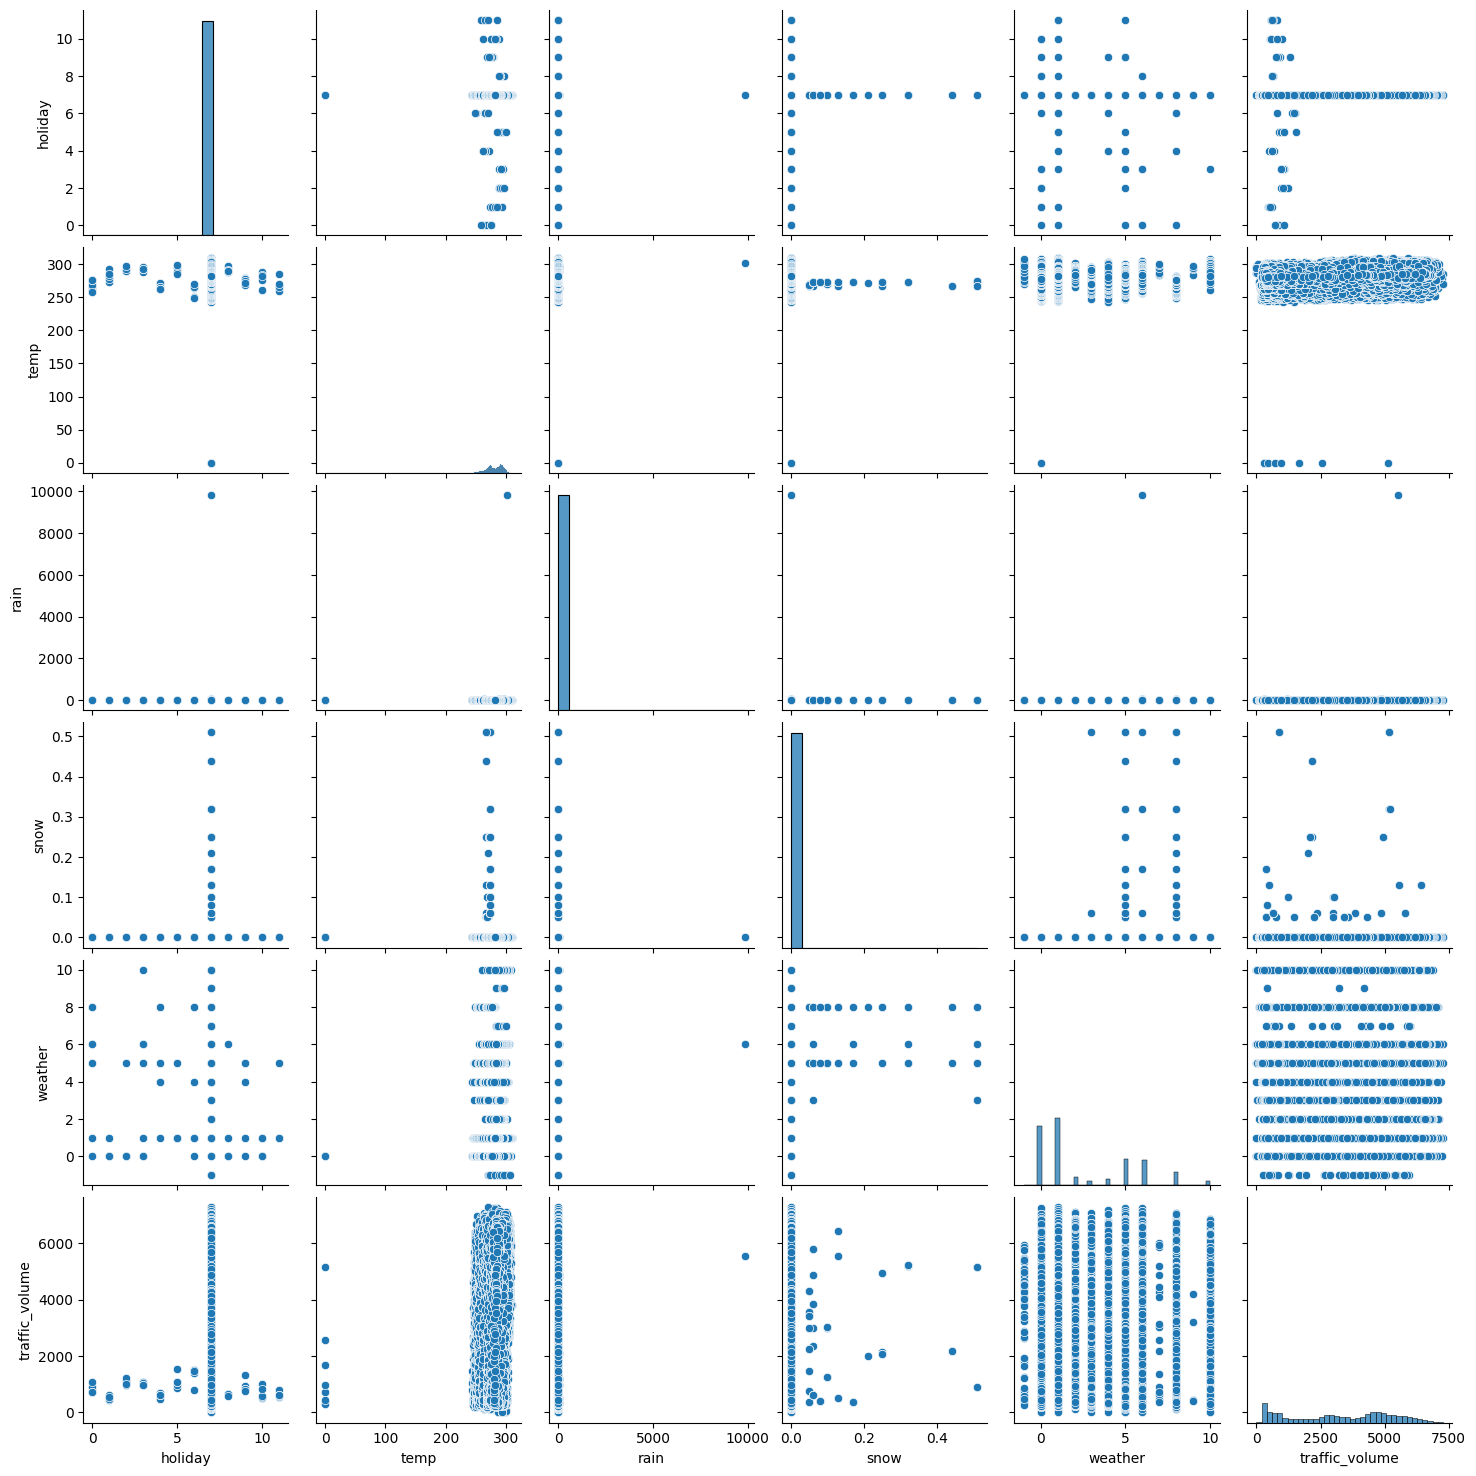

In [ ]:
sns.pairplot(data)

<Axes: >

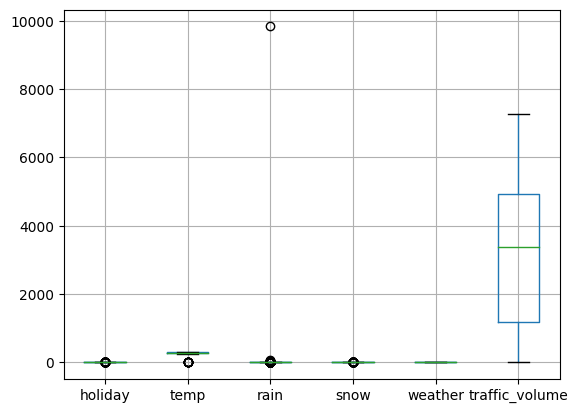

In [ ]:
data.boxplot()

In [ ]:
y=data['traffic_volume']
x=data.drop(columns=['traffic_volume'],axis=1)

In [ ]:
names=x.columns

In [ ]:
from sklearn.preprocessing import scale

In [ ]:
x=scale(x)

In [ ]:
x=pd.DataFrame(x,columns=names)

In [ ]:
x.head()

,holiday,temp,rain,snow,weather,day,month,year,hours,minutes,seconds
0,0.015856,0.530485,-0.007463,-0.027235,-0.565339,-1.574903,1.02758,-1.855294,-0.345548,0.0,0.0
1,0.015856,0.611467,-0.007463,-0.027235,-0.565339,-1.574903,1.02758,-1.855294,-0.201459,0.0,0.0
2,0.015856,0.627964,-0.007463,-0.027235,-0.565339,-1.574903,1.02758,-1.855294,-0.057371,0.0,0.0
3,0.015856,0.669205,-0.007463,-0.027235,-0.565339,-1.574903,1.02758,-1.855294,0.086718,0.0,0.0
4,0.015856,0.744939,-0.007463,-0.027235,-0.565339,-1.574903,1.02758,-1.855294,0.230807,0.0,0.0


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state =0)


# Model Building



In [ ]:
from sklearn import linear_model
from sklearn import tree
from sklearn import ensemble
from sklearn import svm
import xgboost

In [ ]:
lin_reg= linear_model.LinearRegression()
Dtree = tree.DecisionTreeRegressor()
Rand= ensemble.RandomForestRegressor()
svr=svm.SVR()
XGB=xgboost.XGBRegressor()

In [ ]:
lin_reg.fit(x_train,y_train)
Dtree.fit(x_train,y_train)
Rand.fit(x_train,y_train)
svr.fit(x_train,y_train)
XGB.fit(x_train,y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
p1=lin_reg.predict(x_train)
p2=Dtree.predict(x_train)
p3=Rand.predict(x_train)
p4=svr.predict(x_train)
p5=XGB.predict(x_train)

In [ ]:
from sklearn import metrics

In [ ]:
print(metrics.r2_score(p1,y_train))
print(metrics.r2_score(p2,y_train))
print(metrics.r2_score(p3,y_train))
print(metrics.r2_score(p4,y_train))
print(metrics.r2_score(p5,y_train))

-5.517383877973709
1.0
0.9751196910381695
-12.186526578253414
0.8411290768657846


In [ ]:
MSE= metrics.mean_squared_error(p3,y_train)

In [ ]:
np.sqrt(MSE)

297.4608528358805

In [ ]:
import pickle

In [ ]:
pickle.dump(Rand,open('model.pkl','wb'))
pickle.dump(lin_reg,open('encoder.pkl','wb'))